In [12]:
import pandas as pd
import numpy as np
import json
import glob
import pandas as pd
import csv

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Spacy
import spacy
from nltk.corpus import stopwords


In [13]:
# Bag of words for each category to classify text

topics = {"fee": ["fee", "money", "price", "cost", "expensive", "cost", "charge"],
        "transaction": ["deposit", "withdrawal", "bank", "delay", "debit", "credit", "card"],
        "trust": ["company", "scam"],
        "service": ["service", "customer", "contact", "support", "email"],
        "app": ["interface", "easy", "friendly", "clean", "user"]}

In [14]:
# Pre-processing the document
all_files = ["robinhood.csv", "webull.csv", "etoro.csv"]

# Combine all the csv files into one
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

# Get only rows with >50 chars or about 10 words
def get_rows(row):
    row["sufficient_len"] = True if type(row["content"]) == str and len(row["content"]) > 50 else False;
    return row;
    
frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.loc[:, ["reviewId", "content", "score", "at"]]
frame = frame.apply(get_rows, axis=1)
frame = frame.loc[frame["sufficient_len"] == True]
frame


,reviewId,content,score,at,sufficient_len
2,748c2355-d884-463b-8c9a-46d9e8cfa1ea,"I once wrote my reviews here, how robinhood ha...",1,2022-07-01 11:01:46,True
3,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,"Buy stock, market updates. If you know exactly...",5,2022-07-01 10:51:17,True
7,7444c5dc-8395-4890-9c47-5f690fb6f69b,Good app Very bad horrible email customer supp...,1,2022-07-01 09:55:46,True
8,38b8059c-47bd-4998-9d56-fecf18663cc6,It's like........the first time I fell in love...,5,2022-07-01 09:30:57,True
10,3ced6d9c-be58-4213-bdf3-ec12a750c288,Rep keep hanging on me instead of helping. Aft...,1,2022-07-01 09:12:50,True
...,...,...,...,...,...
14992,b28ce657-a318-454e-abd7-06d6db719655,apps is easy good enjoy my apps 🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰...,5,2021-05-30 11:19:26,True
14993,bdaa0b97-d095-4a04-8e5a-3b68a40d0c22,this app is very good I became a multi billion...,5,2021-05-30 10:13:56,True
14994,35bc4a50-a347-44d8-bdcb-0e259b024e5b,Good apps for investment but it's lack evertin...,4,2021-05-30 10:01:12,True
14995,dd441a32-1fc6-47a9-b5de-adaa7901f1fa,Great way to be conned by Toro Telemarketing i...,1,2021-05-30 09:03:27,True


In [18]:
# Process documents and insert to df

spacy.load
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
allowed_postags=["NOUN", "ADJ"]
stop_words=stopwords.words("english")
def insert_processed_doc(row):

    # Lemmatization
    text = row["content"]
    doc = nlp(text) # Create document from the raw text/string
    new_text = []
    for token in doc:
        if token.pos_ in allowed_postags and token.pos_ not in stop_words:
            new_text.append(token.lemma_) # Appends only lemma to new_text
    lemma = " ".join(new_text)
 
    # Remove marks and make everything lowercase
    final_doc = gensim.utils.simple_preprocess(lemma, deacc=True);

    row["content_proc"] = final_doc
    return row

frame = frame.apply(insert_processed_doc, axis=1)

frame


,reviewId,content,score,at,sufficient_len,content_proc
2,748c2355-d884-463b-8c9a-46d9e8cfa1ea,"I once wrote my reviews here, how robinhood ha...",1,2022-07-01 11:01:46,True,"[review, robinhood, fund, account, easy, money..."
3,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,"Buy stock, market updates. If you know exactly...",5,2022-07-01 10:51:17,True,"[stock, market, update, format, good, current,..."
7,7444c5dc-8395-4890-9c47-5f690fb6f69b,Good app Very bad horrible email customer supp...,1,2022-07-01 09:55:46,True,"[good, app, bad, horrible, email, customer, su..."
8,38b8059c-47bd-4998-9d56-fecf18663cc6,It's like........the first time I fell in love...,5,2022-07-01 09:30:57,True,"[first, time, love, awesome, feeling, good, pa..."
10,3ced6d9c-be58-4213-bdf3-ec12a750c288,Rep keep hanging on me instead of helping. Aft...,1,2022-07-01 09:12:50,True,"[nd, deal, point, issue, first, call, app]"
...,...,...,...,...,...,...
14992,b28ce657-a318-454e-abd7-06d6db719655,apps is easy good enjoy my apps 🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰...,5,2021-05-30 11:19:26,True,"[app, easy, good, app]"
14993,bdaa0b97-d095-4a04-8e5a-3b68a40d0c22,this app is very good I became a multi billion...,5,2021-05-30 10:13:56,True,"[app, good, multi, billionaire, hour, poor, ho..."
14994,35bc4a50-a347-44d8-bdcb-0e259b024e5b,Good apps for investment but it's lack evertin...,4,2021-05-30 10:01:12,True,"[good, app, investment, lack, evertine, deposi..."
14995,dd441a32-1fc6-47a9-b5de-adaa7901f1fa,Great way to be conned by Toro Telemarketing i...,1,2021-05-30 09:03:27,True,"[great, way, commie, building, country, portfo..."


In [19]:
# Returns the topic which the processed_doc contains the most words from
def get_topic(topics, processed_doc):
    topic_scores = dict.fromkeys(topics, 0)
    for word in processed_doc:
        for topic in topics.keys():
            if word in topics[topic]: topic_scores[topic] += 1
    topic_max = max(topic_scores, key=topic_scores.get)  
    if topic_scores[topic_max] == 0: topic_max = "N"     
    return (topic_max, topic_scores[topic_max] if topic_max != "N" else 0)

In [20]:
frame

,reviewId,content,score,at,sufficient_len,content_proc
2,748c2355-d884-463b-8c9a-46d9e8cfa1ea,"I once wrote my reviews here, how robinhood ha...",1,2022-07-01 11:01:46,True,"[review, robinhood, fund, account, easy, money..."
3,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,"Buy stock, market updates. If you know exactly...",5,2022-07-01 10:51:17,True,"[stock, market, update, format, good, current,..."
7,7444c5dc-8395-4890-9c47-5f690fb6f69b,Good app Very bad horrible email customer supp...,1,2022-07-01 09:55:46,True,"[good, app, bad, horrible, email, customer, su..."
8,38b8059c-47bd-4998-9d56-fecf18663cc6,It's like........the first time I fell in love...,5,2022-07-01 09:30:57,True,"[first, time, love, awesome, feeling, good, pa..."
10,3ced6d9c-be58-4213-bdf3-ec12a750c288,Rep keep hanging on me instead of helping. Aft...,1,2022-07-01 09:12:50,True,"[nd, deal, point, issue, first, call, app]"
...,...,...,...,...,...,...
14992,b28ce657-a318-454e-abd7-06d6db719655,apps is easy good enjoy my apps 🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰...,5,2021-05-30 11:19:26,True,"[app, easy, good, app]"
14993,bdaa0b97-d095-4a04-8e5a-3b68a40d0c22,this app is very good I became a multi billion...,5,2021-05-30 10:13:56,True,"[app, good, multi, billionaire, hour, poor, ho..."
14994,35bc4a50-a347-44d8-bdcb-0e259b024e5b,Good apps for investment but it's lack evertin...,4,2021-05-30 10:01:12,True,"[good, app, investment, lack, evertine, deposi..."
14995,dd441a32-1fc6-47a9-b5de-adaa7901f1fa,Great way to be conned by Toro Telemarketing i...,1,2021-05-30 09:03:27,True,"[great, way, commie, building, country, portfo..."


In [21]:
def insert_topic(row):
    topic_max, topic_score = get_topic(topics, row["content_proc"])
    row["topic"] = topic_max
    row["topic_score"] = topic_score
    return row

frame = frame.apply(insert_topic, axis=1)

In [22]:
frame.loc[frame["topic"] != "N"]

,reviewId,content,score,at,sufficient_len,content_proc,topic,topic_score
2,748c2355-d884-463b-8c9a-46d9e8cfa1ea,"I once wrote my reviews here, how robinhood ha...",1,2022-07-01 11:01:46,True,"[review, robinhood, fund, account, easy, money...",fee,3
3,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,"Buy stock, market updates. If you know exactly...",5,2022-07-01 10:51:17,True,"[stock, market, update, format, good, current,...",trust,1
7,7444c5dc-8395-4890-9c47-5f690fb6f69b,Good app Very bad horrible email customer supp...,1,2022-07-01 09:55:46,True,"[good, app, bad, horrible, email, customer, su...",service,4
12,ebfb12ca-6ac4-4134-bdd6-335002e8f3d2,Great app with an interface that is only getti...,5,2022-07-01 08:44:26,True,"[great, app, interface, well, tax, option, abi...",app,1
15,8185f294-3356-4fc9-8b65-b612932ee58e,I am new to this entire thing and Robinhood ha...,5,2022-07-01 07:10:38,True,"[new, entire, thing, easy, least, constant, fl...",app,1
...,...,...,...,...,...,...,...,...
14981,3f2b7de9-8745-48de-a047-08555ae5d99a,"No sign up bonus, you guys need to put your cu...",1,2021-05-31 03:13:02,True,"[sign, bonus, guy, customer, bunch, horror, st...",service,2
14985,c4e82ffa-71ab-4a7b-bf83-9aab29657153,Great app but lacks profits withdrawals alone ...,4,2021-05-30 21:52:36,True,"[great, app, profit, withdrawal, alone, invest...",transaction,1
14992,b28ce657-a318-454e-abd7-06d6db719655,apps is easy good enjoy my apps 🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰...,5,2021-05-30 11:19:26,True,"[app, easy, good, app]",app,1
14994,35bc4a50-a347-44d8-bdcb-0e259b024e5b,Good apps for investment but it's lack evertin...,4,2021-05-30 10:01:12,True,"[good, app, investment, lack, evertine, deposi...",transaction,1


In [23]:
frame["topic"].value_counts()

N              3764
fee            1432
app            1368
service         624
transaction     408
trust           215
Name: topic, dtype: int64

In [24]:
# Make predictions on sentiment
from textblob import TextBlob

def add_sentiment_cols(row):
    sent_obj = TextBlob(row["content"])
    row["sent_pol"] = sent_obj.sentiment.polarity
    row["sent_sub"] = sent_obj.sentiment.subjectivity
    return row;

frame = frame.apply(add_sentiment_cols, axis="columns")
frame

,reviewId,content,score,at,sufficient_len,content_proc,topic,topic_score,sent_pol,sent_sub
2,748c2355-d884-463b-8c9a-46d9e8cfa1ea,"I once wrote my reviews here, how robinhood ha...",1,2022-07-01 11:01:46,True,"[review, robinhood, fund, account, easy, money...",fee,3,0.369333,0.671111
3,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,"Buy stock, market updates. If you know exactly...",5,2022-07-01 10:51:17,True,"[stock, market, update, format, good, current,...",trust,1,0.209666,0.494586
7,7444c5dc-8395-4890-9c47-5f690fb6f69b,Good app Very bad horrible email customer supp...,1,2022-07-01 09:55:46,True,"[good, app, bad, horrible, email, customer, su...",service,4,-0.242000,0.533333
8,38b8059c-47bd-4998-9d56-fecf18663cc6,It's like........the first time I fell in love...,5,2022-07-01 09:30:57,True,"[first, time, love, awesome, feeling, good, pa...",N,0,0.550000,0.446667
10,3ced6d9c-be58-4213-bdf3-ec12a750c288,Rep keep hanging on me instead of helping. Aft...,1,2022-07-01 09:12:50,True,"[nd, deal, point, issue, first, call, app]",N,0,0.125000,0.305556
...,...,...,...,...,...,...,...,...,...,...
14992,b28ce657-a318-454e-abd7-06d6db719655,apps is easy good enjoy my apps 🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰🥰...,5,2021-05-30 11:19:26,True,"[app, easy, good, app]",app,1,0.511111,0.644444
14993,bdaa0b97-d095-4a04-8e5a-3b68a40d0c22,this app is very good I became a multi billion...,5,2021-05-30 10:13:56,True,"[app, good, multi, billionaire, hour, poor, ho...",N,0,0.281667,0.540833
14994,35bc4a50-a347-44d8-bdcb-0e259b024e5b,Good apps for investment but it's lack evertin...,4,2021-05-30 10:01:12,True,"[good, app, investment, lack, evertine, deposi...",transaction,1,0.700000,0.600000
14995,dd441a32-1fc6-47a9-b5de-adaa7901f1fa,Great way to be conned by Toro Telemarketing i...,1,2021-05-30 09:03:27,True,"[great, way, commie, building, country, portfo...",fee,1,0.432552,0.408333


In [25]:
# Create new DF to store whether sentiment is positive
sentiment_df = frame.copy()
sentiment_df.reset_index(inplace=True)
sentiment_df.drop(columns="index", inplace=True)
sentiment_df["is_positive"] = sentiment_df["sent_pol"] > 0
sentiment_df.head(100)

,reviewId,content,score,at,sufficient_len,content_proc,topic,topic_score,sent_pol,sent_sub,is_positive
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,"I once wrote my reviews here, how robinhood ha...",1,2022-07-01 11:01:46,True,"[review, robinhood, fund, account, easy, money...",fee,3,0.369333,0.671111,True
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,"Buy stock, market updates. If you know exactly...",5,2022-07-01 10:51:17,True,"[stock, market, update, format, good, current,...",trust,1,0.209666,0.494586,True
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,Good app Very bad horrible email customer supp...,1,2022-07-01 09:55:46,True,"[good, app, bad, horrible, email, customer, su...",service,4,-0.242000,0.533333,False
3,38b8059c-47bd-4998-9d56-fecf18663cc6,It's like........the first time I fell in love...,5,2022-07-01 09:30:57,True,"[first, time, love, awesome, feeling, good, pa...",N,0,0.550000,0.446667,True
4,3ced6d9c-be58-4213-bdf3-ec12a750c288,Rep keep hanging on me instead of helping. Aft...,1,2022-07-01 09:12:50,True,"[nd, deal, point, issue, first, call, app]",N,0,0.125000,0.305556,True
...,...,...,...,...,...,...,...,...,...,...,...
95,ce708564-94e8-4b53-a011-0a563e59303d,Love the simplicity of Robinhood's individual ...,5,2022-06-25 23:22:14,True,"[simplicity, individual, trading, app, other, ...",N,0,0.131250,0.575000,True
96,3cc0f164-d2b7-4b52-a9e3-a2c7352744bd,An app/website with potential...graphs could b...,3,2022-06-25 22:48:34,True,"[app, website, potential, graph, detailed, mor...",N,0,0.196939,0.391837,True
97,512b2e75-51e5-45d0-b45d-91d82002da07,I've been investing since 2020 and Robinhood h...,4,2022-06-25 21:04:08,True,"[easy, fee]",fee,1,0.186111,0.577778,True
98,388a4660-0607-45bb-9d4a-7d7ba909e336,I know a product users would love add to the p...,4,2022-06-25 18:19:06,True,"[product, user, platform, paper, trading, good]",app,1,0.600000,0.600000,True


In [26]:
# for each sentence - select items with same review id, select ones with same topic, and average sent pol.
reviews_df = {"reviewId":[], "topic":[], "sent_pol": [], "sent_sub": [], "rating": []}
for reviewId in sentiment_df["reviewId"].unique():
    for category in sentiment_df["topic"].unique():
        reviewer_sent_same_topic = sentiment_df.loc[(sentiment_df["reviewId"] == reviewId) & (sentiment_df["topic"] == category)]
        if not reviewer_sent_same_topic.empty:
            sent_pol = reviewer_sent_same_topic["sent_pol"].mean()
            sent_sub = reviewer_sent_same_topic["sent_sub"].mean()
            reviews_df["reviewId"].append(reviewId)
            reviews_df["topic"].append(category)
            reviews_df["sent_pol"].append(sent_pol)
            reviews_df["sent_sub"].append(sent_pol)
            reviews_df["rating"].append(reviewer_sent_same_topic["score"].mean())

reviews_df = pd.DataFrame(reviews_df)


In [27]:
reviews_df

,reviewId,topic,sent_pol,sent_sub,rating
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,fee,0.369333,0.369333,1.0
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,trust,0.209666,0.209666,5.0
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,service,-0.242000,-0.242000,1.0
3,38b8059c-47bd-4998-9d56-fecf18663cc6,N,0.550000,0.550000,5.0
4,3ced6d9c-be58-4213-bdf3-ec12a750c288,N,0.125000,0.125000,1.0
...,...,...,...,...,...
7806,b28ce657-a318-454e-abd7-06d6db719655,app,0.511111,0.511111,5.0
7807,bdaa0b97-d095-4a04-8e5a-3b68a40d0c22,N,0.281667,0.281667,5.0
7808,35bc4a50-a347-44d8-bdcb-0e259b024e5b,transaction,0.700000,0.700000,4.0
7809,dd441a32-1fc6-47a9-b5de-adaa7901f1fa,fee,0.432552,0.432552,1.0


Text(0, 0.5, 'Rating')

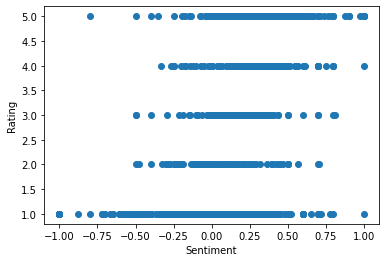

In [28]:
# See chart
import matplotlib.pyplot as plt
from importlib import reload

TOPIC_NAME = "fee"

plt = reload(plt)
x = reviews_df[reviews_df["topic"] == TOPIC_NAME]["sent_pol"] #! When you don't use loc you get a series
y = reviews_df[reviews_df["topic"] == TOPIC_NAME]["rating"]

plt.scatter(x, y)
plt.xlabel("Sentiment") #! dont do plt.xlabel = "sentiment"
plt.ylabel("Rating")


In [29]:
# Create the model and display fit
from sklearn import linear_model
model = linear_model.LinearRegression()
x = reviews_df.loc[reviews_df["topic"] == TOPIC_NAME].loc[:, ["sent_pol"]]
model.fit(x, y)
model.score(x, y)

0.2485897372933742

In [30]:
topic_dict = {
    "app" : "App/UI/Features",
    "fee" : "Fees",
    "transaction" : "Deposit/Withdrawals/Transaction Handling",
    # "R" : "Registration/Verification Process",
    "service" : "Customer Service",
    "trust" : "Trust and Company Reputation",
    "N": "Ignore this"
}

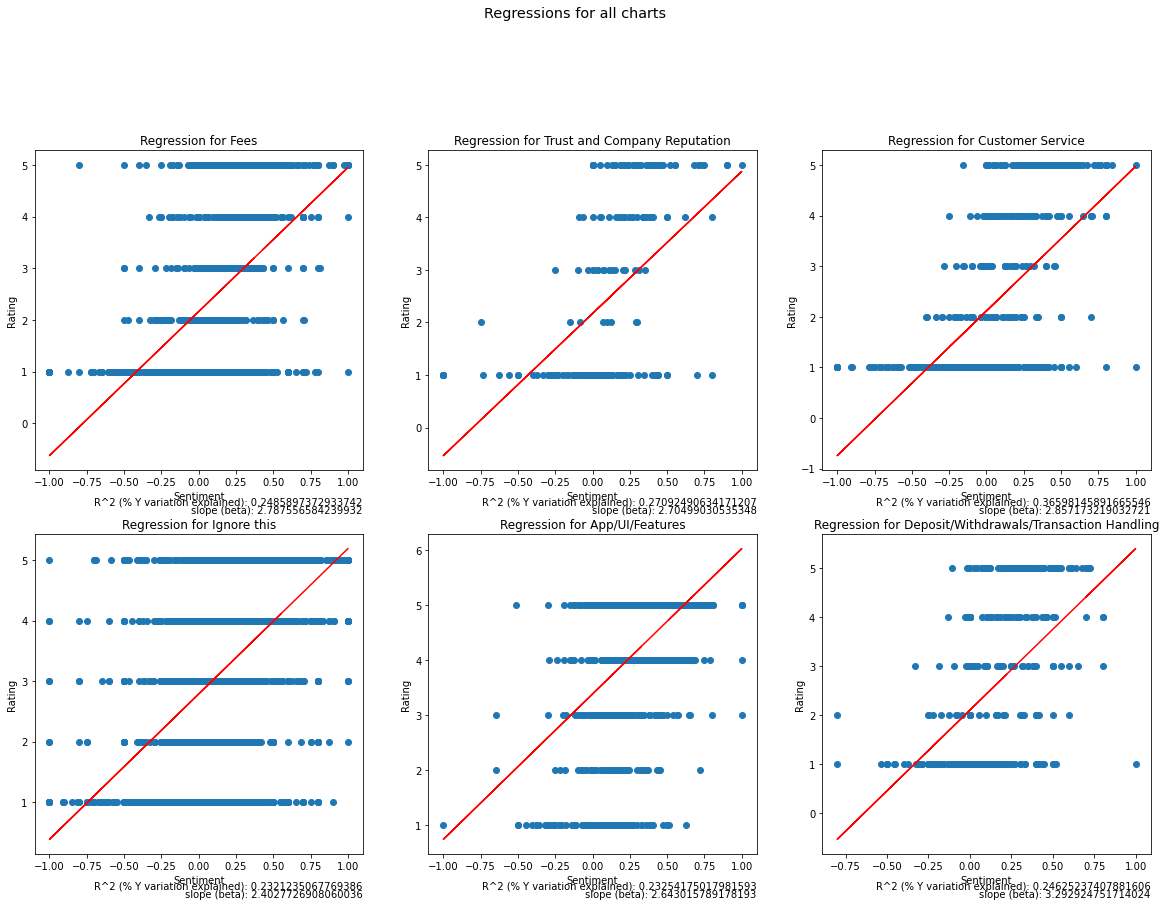

In [31]:
# Now we plot for all the topic
fig = plt.figure(figsize=(20,20))
st = fig.suptitle("Regressions for all charts", fontsize="x-large")

idx = 1
for key in reviews_df["topic"].unique():
    y = reviews_df[reviews_df["topic"] == key]["rating"]
    x = reviews_df.loc[reviews_df["topic"] == key].loc[:, ["sent_pol"]]
    model.fit(x, y)
    score = model.score(x, y)
    x = reviews_df[reviews_df["topic"] == key]["sent_pol"]
    curr_plot = fig.add_subplot(3, 3, idx)
    curr_plot.scatter(x, y)
    curr_plot.set_title(f"Regression for {topic_dict[key]}")
    curr_plot.set_xlabel("Sentiment") #! dont do plt.xlabel = "sentiment"
    curr_plot.set_ylabel("Rating")
    curr_plot.plot(x, model.coef_*x + model.intercept_, "r") 
    curr_plot.annotate(f"slope (beta): {model.coef_[0]}",
            xy = (1.0, -0.125),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
    curr_plot.annotate(f"R^2 (% Y variation explained): {score}",
            xy = (1.0, -0.1),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

    idx = idx + 1

fig.show()

In [ ]:
reviews_df.to_csv("sent_normal_bow.csv")